In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

from sklearn.svm import LinearSVC

import missingno as msno # none 데이터를 쉽게 보여주는 library

import warnings
warnings.filterwarnings('ignore') 

# %matplot inline # matplot 를 사용해서 그리면 새로운 윈도우가 뜨는데 이 줄을 추가하면 바로 볼 수 있다

In [39]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
df_train.describe()    # dataFrame 객체의 간단한 통계적 수치를 보여준다

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df_train.shape

(891, 12)

In [42]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [51]:
for col in df_train.columns:
    msg = 'colum: {:>11}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
        # 각 column 별 결측치 비율을 msg에 저장
    print(msg)

colum: PassengerId	 Percent of NaN value: 0.00%
colum:    Survived	 Percent of NaN value: 0.00%
colum:      Pclass	 Percent of NaN value: 0.00%
colum:        Name	 Percent of NaN value: 0.00%
colum:         Sex	 Percent of NaN value: 0.00%
colum:         Age	 Percent of NaN value: 19.87%
colum:       SibSp	 Percent of NaN value: 0.00%
colum:       Parch	 Percent of NaN value: 0.00%
colum:      Ticket	 Percent of NaN value: 0.00%
colum:        Fare	 Percent of NaN value: 0.00%
colum:       Cabin	 Percent of NaN value: 77.10%
colum:    Embarked	 Percent of NaN value: 0.22%


In [47]:
type(df_train[col])    # 하나의 column와 데이터는 Series 객체이다
df_train[col].isnull().sum()    # Series_Object.sum() 하면 합쳐준다

pandas.core.series.Series

In [50]:
for col in df_test.columns:
    msg = 'colum: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
        # 각 column 별 결측치 비율을 msg에 저장
    print(msg)

colum: PassengerId	 Percent of NaN value: 0.00%
colum:     Pclass	 Percent of NaN value: 0.00%
colum:       Name	 Percent of NaN value: 0.00%
colum:        Sex	 Percent of NaN value: 0.00%
colum:        Age	 Percent of NaN value: 19.87%
colum:      SibSp	 Percent of NaN value: 0.00%
colum:      Parch	 Percent of NaN value: 0.00%
colum:     Ticket	 Percent of NaN value: 0.00%
colum:       Fare	 Percent of NaN value: 0.00%
colum:      Cabin	 Percent of NaN value: 77.10%
colum:   Embarked	 Percent of NaN value: 0.22%


<AxesSubplot:>

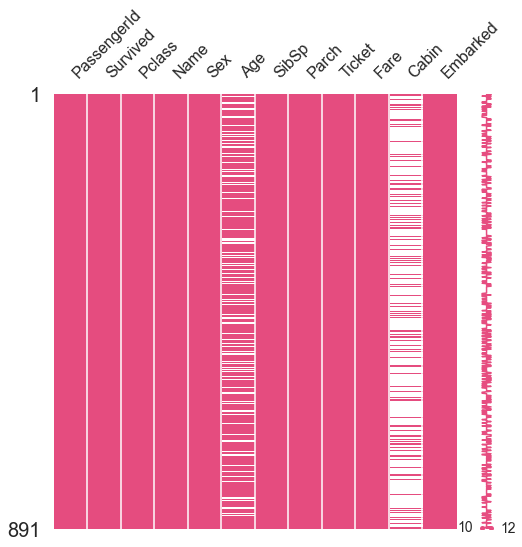

In [64]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.9, 0.3, 0.5))
    # color = (r, g, b)

In [54]:
df_train.iloc[:, 1]    #iloc == index location : 원하는 인덱스의 데이터를 가져온다

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<AxesSubplot:>

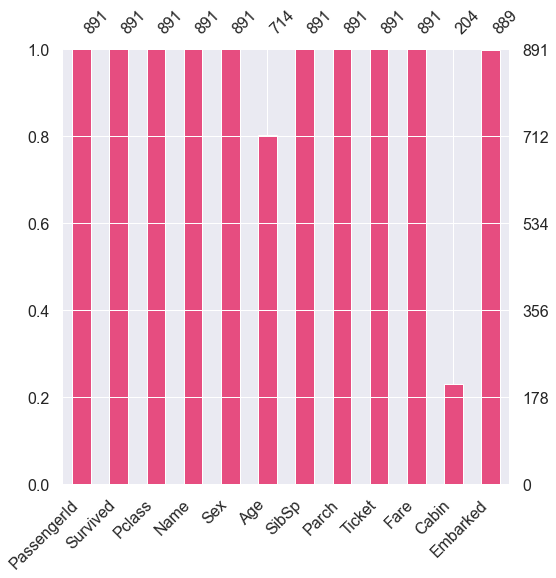

In [62]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color = (0.9, 0.3, 0.5))
    # msno.bar() 를 사용하여 bar chart 로 볼 수도 있다

# 2.EDA - Pclass

In [78]:
target = df_train['Survived']

In [123]:
count = 0
sum = 0
for i in range(df_train.shape[0]):
    if df_train['Age'].isnull()[i] == False:
        sum += df_train['Age'][i]
        count += 1
average_age = sum // count 

for i in range(df_train.shape[0]):
    if df_train['Age'].isnull()[i] == True:
        df_train['Age'][i] = average_age


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [110]:
df_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [98]:
type(df_train['Age'][3])

numpy.float64

In [112]:
for i in range

nan

In [113]:
sum = 0
for i in range(df_train.shape[0]):
    print(df_train['Age'].isnull()[i])

False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
True
False
True
True
False
True
True
False
False
False
True
False
False
False
False
False
True
False
False
True
True
True
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
True
False
False
False
False
False
False
True
False
True
False
False
False
Fa